# 0.0 Imports

In [14]:
from sklearn import datasets as ds
from sklearn import cluster as ct
from sklearn import metrics as mt

from matplotlib import pyplot as plt
import numpy as np

# 1.0 Load Dataset

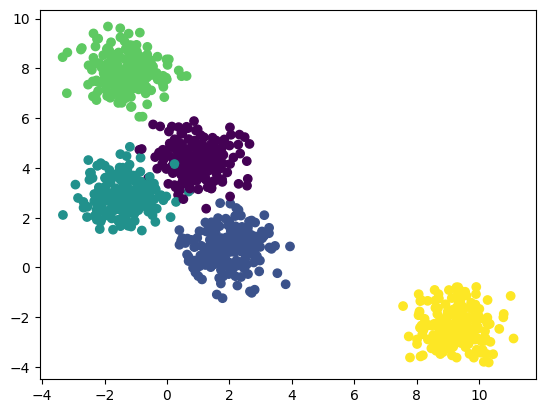

In [38]:
X, y = ds.make_blobs(
                n_samples=1000,        # número de datapoints
                n_features=2,          # número de colunas (features)
                centers=5,             # número de clusters
                cluster_std=0.7,       # desvio padrão entre o ponto e o centroide
                random_state=0         # seed de números pseudo-aleatórios
        )


plt.scatter(X[:, 0], X[:, 1], c=y)

# 2.0 Training K-Means

In [39]:
clusters = np.arange(2, 11, 1)
ss_list = []

for k in clusters:

    # define
    model = ct.KMeans(
                    n_clusters=k,         # Número de cluster que o algoritmo ajustará
                    init='random',        # Método de inicialização dos centroides
                    n_init=10,            # Número de vezes que os centroides serão inicializados
                    random_state=0
                )

    # fit
    labels = model.fit_predict(X)      # Retorna um array contém o label do cluster associado a cada datapoint


    # performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)

    print(f'For k = {k} clusters -> SS = {ss:.4f}')

For k = 2 clusters -> SS = 0.6942
For k = 3 clusters -> SS = 0.6097
For k = 4 clusters -> SS = 0.6284
For k = 5 clusters -> SS = 0.6684
For k = 6 clusters -> SS = 0.5991
For k = 7 clusters -> SS = 0.4997
For k = 8 clusters -> SS = 0.4349
For k = 9 clusters -> SS = 0.4229
For k = 10 clusters -> SS = 0.3954


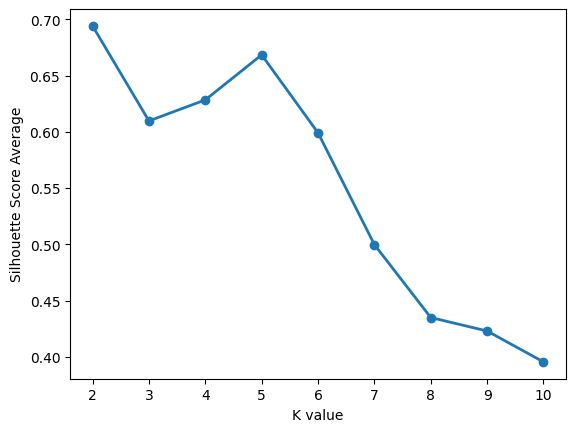

In [40]:
plt.plot(clusters, ss_list, marker='o', linewidth=2)

plt.xlabel('K value')
plt.ylabel('Silhouette Score Average')

plt.show()

# 3.0 Fine Tunning